In [1]:
import pandas as pd

In [2]:
text = pd.read_csv('text.csv')
text

,WORDNO,WORD
0,1,katekizmas
1,2,arba
2,3,mokslas
3,4,kiekvienam
4,5,krikščioniui
...,...,...
16575,16576,amžių
16576,16577,amžinų
16577,16578,","
16578,16579,amen


In [3]:
vocab = pd.read_csv('vocab.csv')
vocab

,WORD,POS
0,***,***
1,",",-
2,-,-
3,.,-
4,?,-
...,...,...
3963,žymę,NaN
3964,žyminame,V
3965,žynauja,V
3966,žyvate,NaN


In [54]:
df = pd.merge(text, vocab, on='WORD')
groups = df.groupby('POS')

In [73]:
groups.count()

,WORDNO,WORD
POS,,
***,37,37
-,3982,3982
1,24,24
10,5,5
11,3,3
112,1,1
12,2,2
14,2,2
15,2,2


In [86]:
import matplotlib
import matplotlib.pyplot as plt

C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean['Mean'] = pd.DataFrame(agr)
C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean['Mean'] = pd.DataFrame(agr)
C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean['Mean'] = pd.DataFrame(agr)
C:\Python3\lib\site-packages\matplotlib\axes\_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Python3\lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean['Mean'] = pd.DataFrame(agr)
C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean['Mean'] = pd.DataFrame(agr)
C:\Users\Mila\AppData\Local\Temp\ipykernel_4164\3794215689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

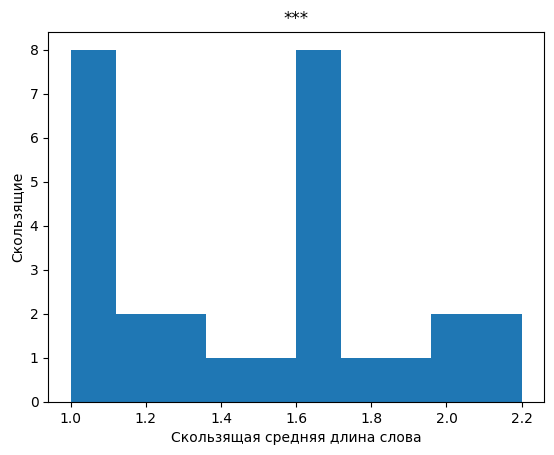

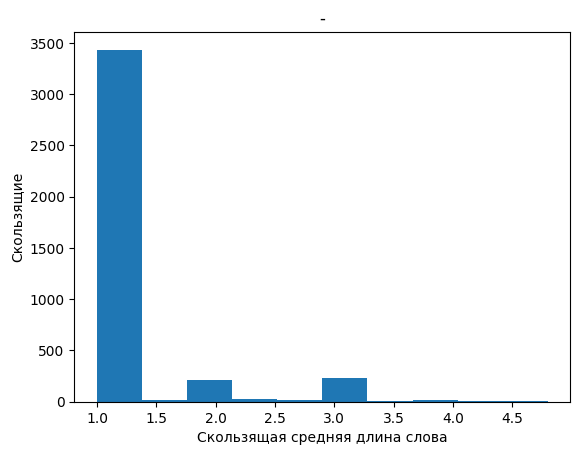

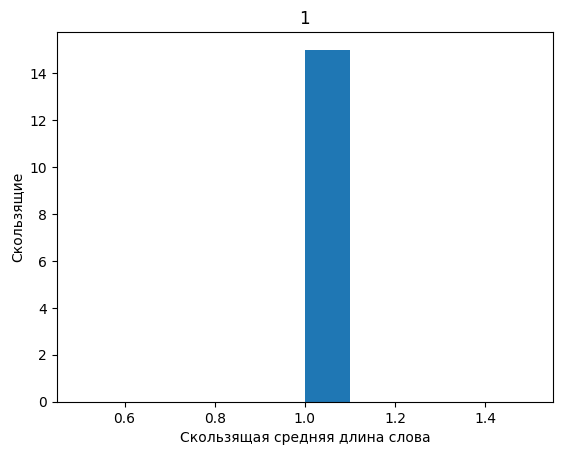

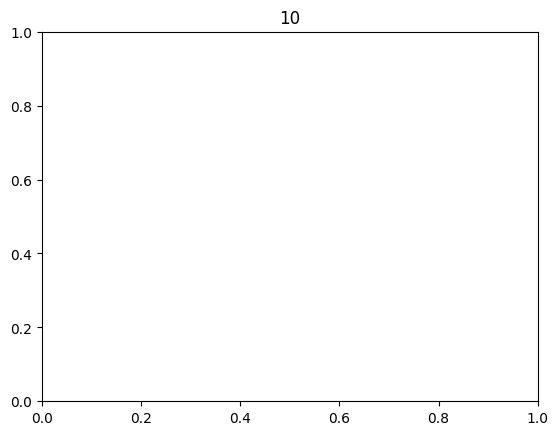

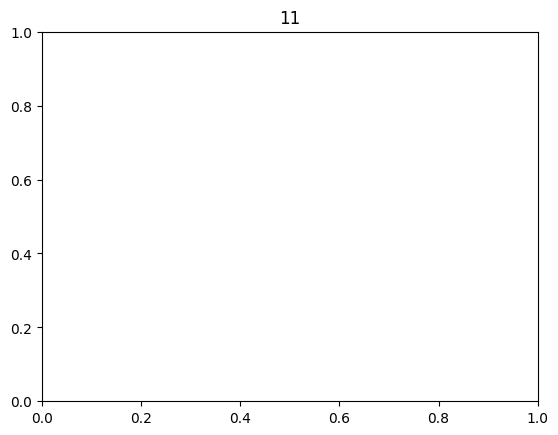

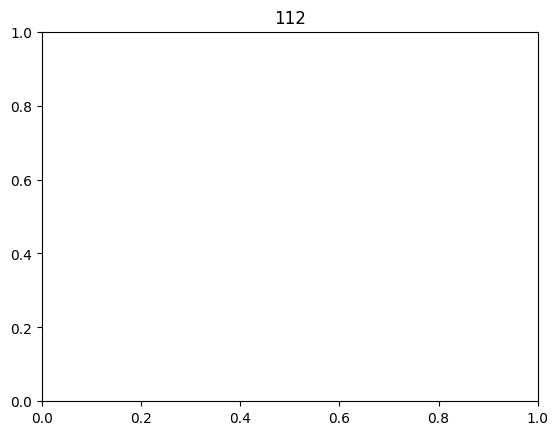

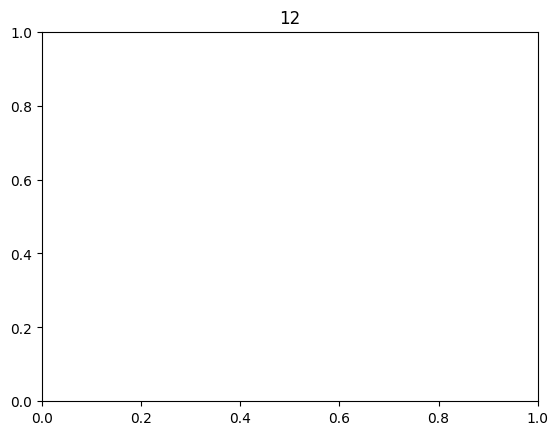

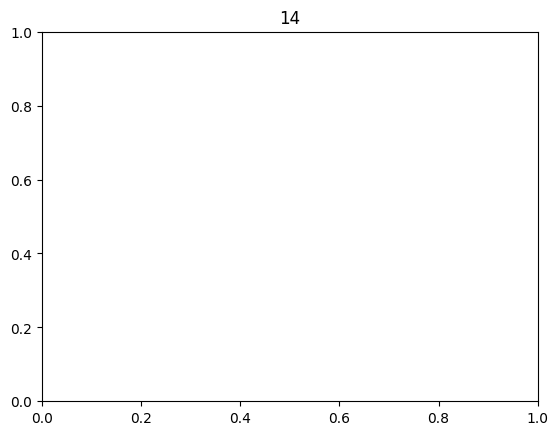

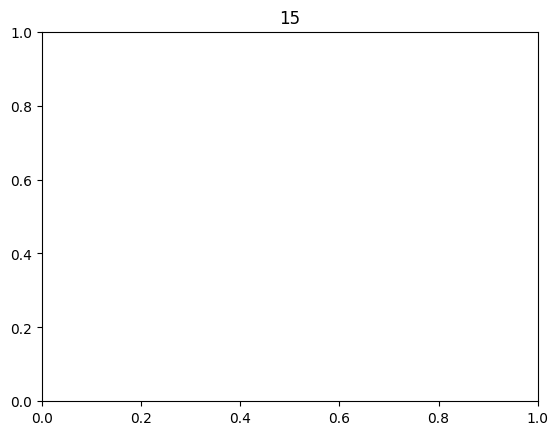

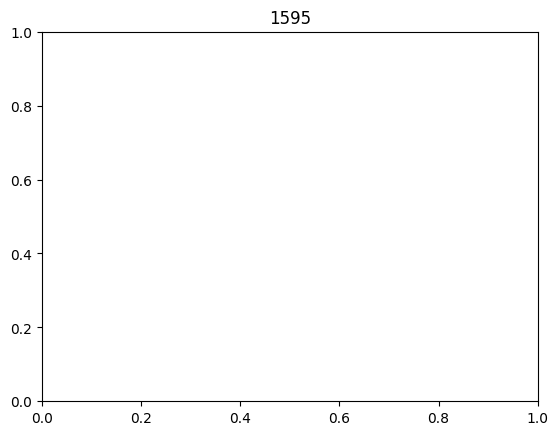

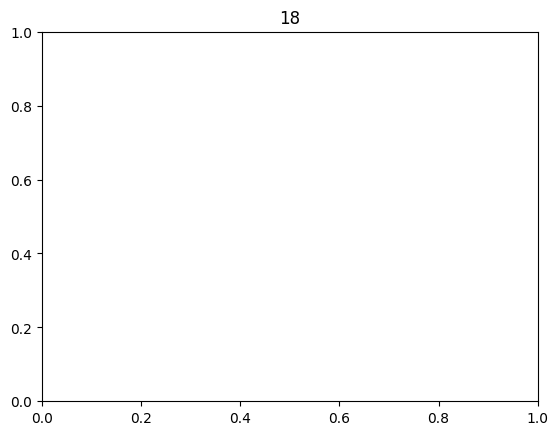

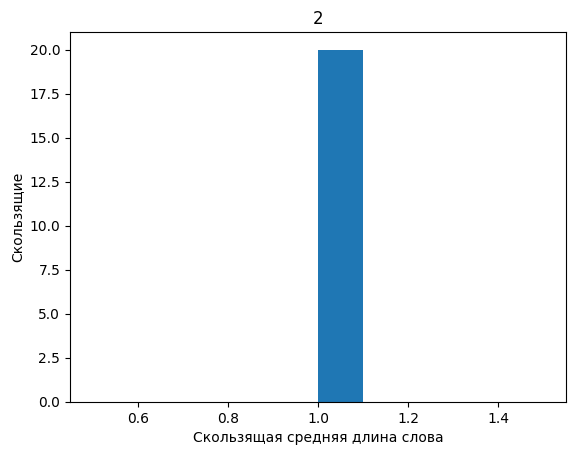

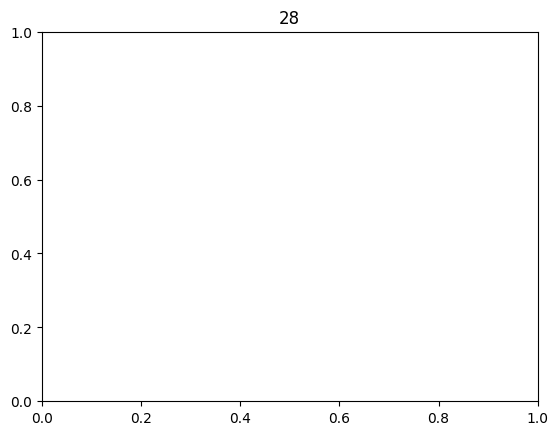

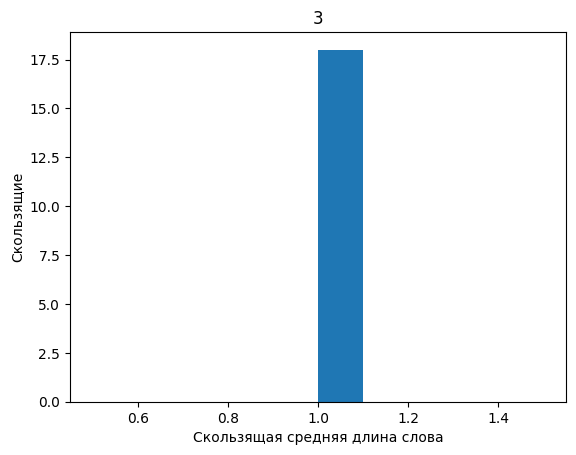

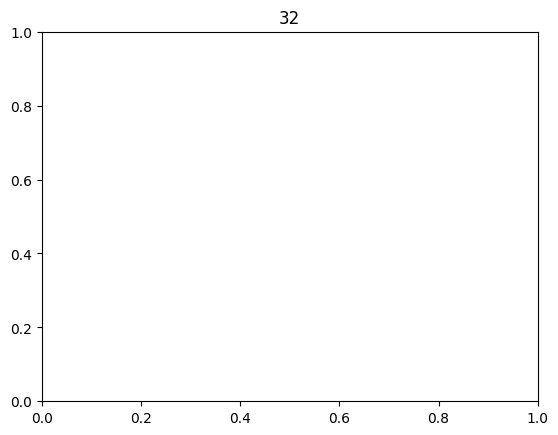

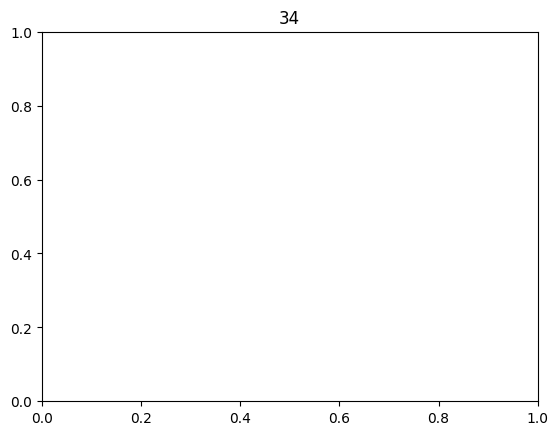

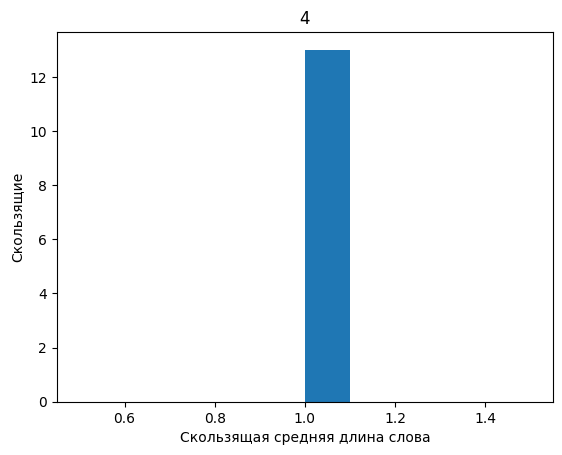

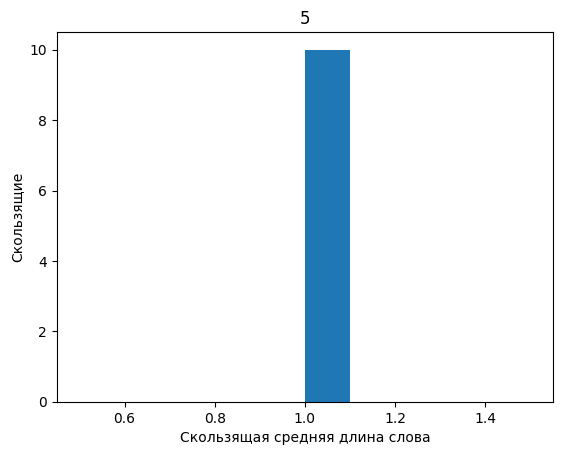

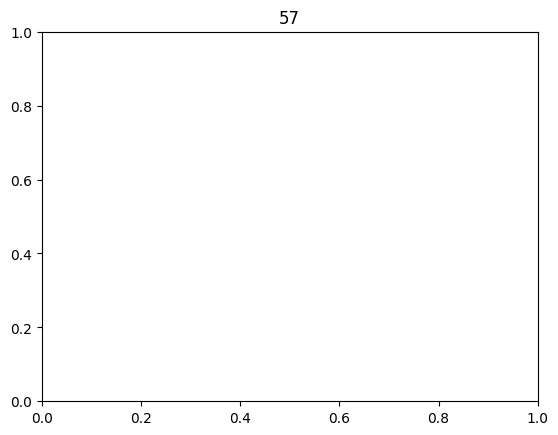

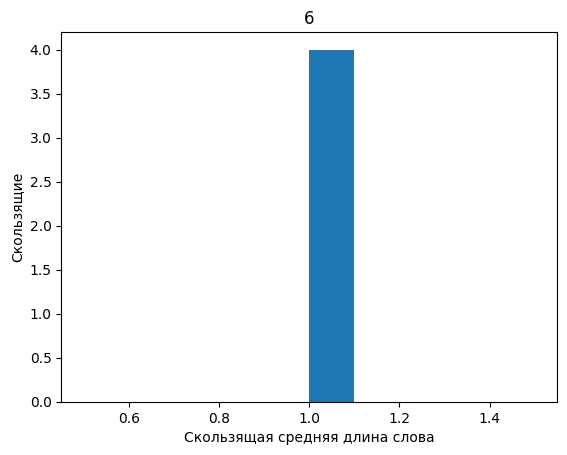

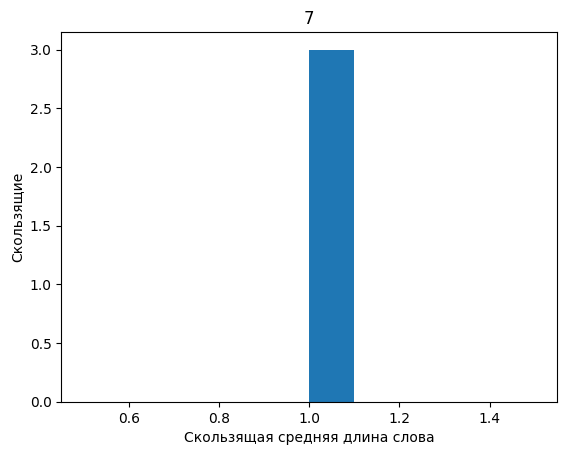

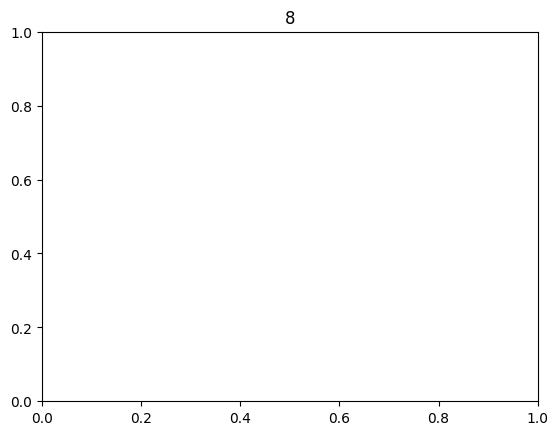

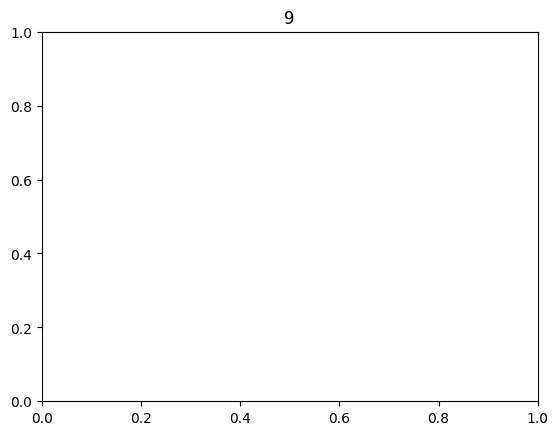

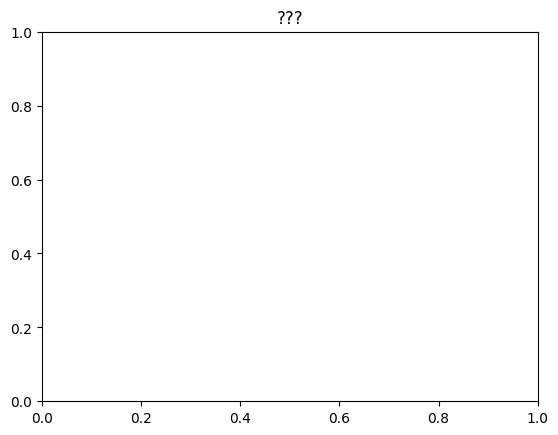

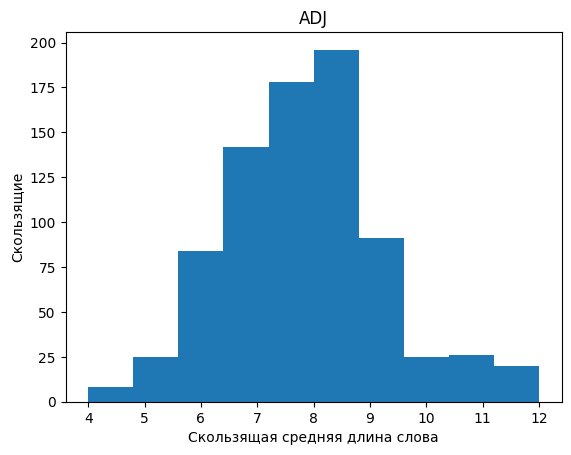

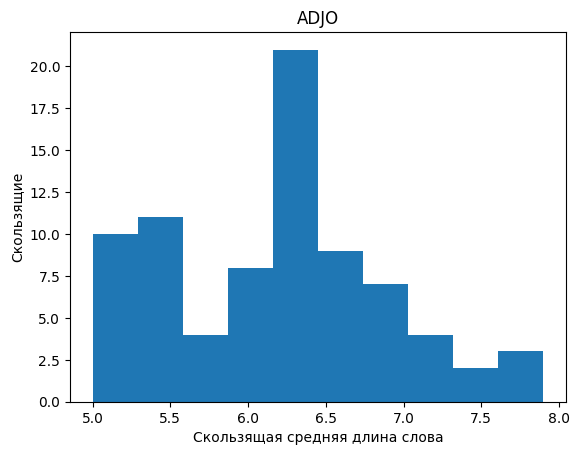

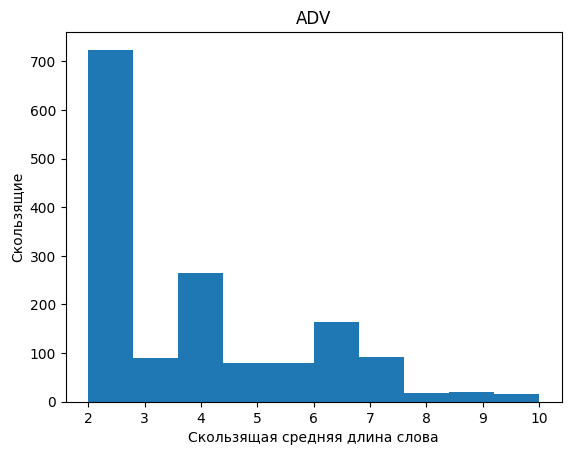

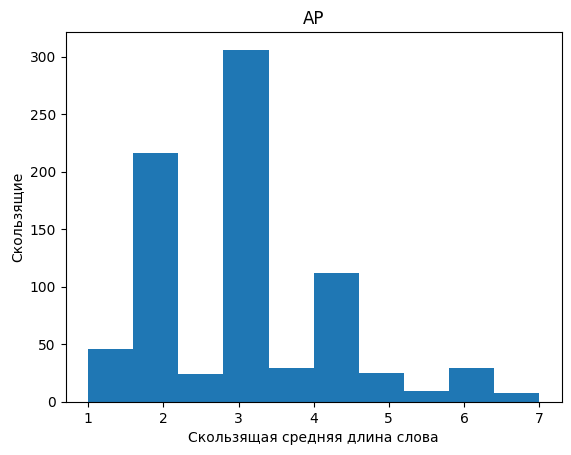

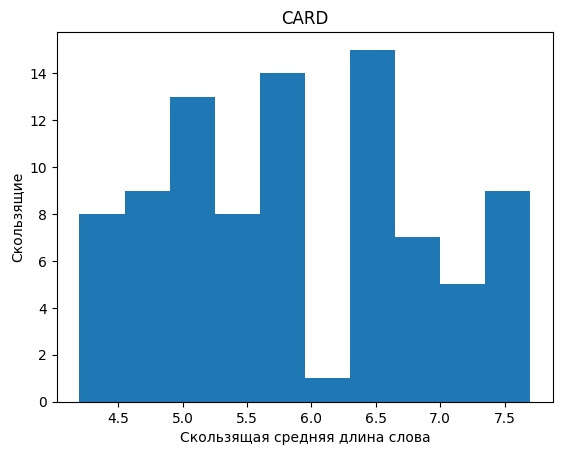

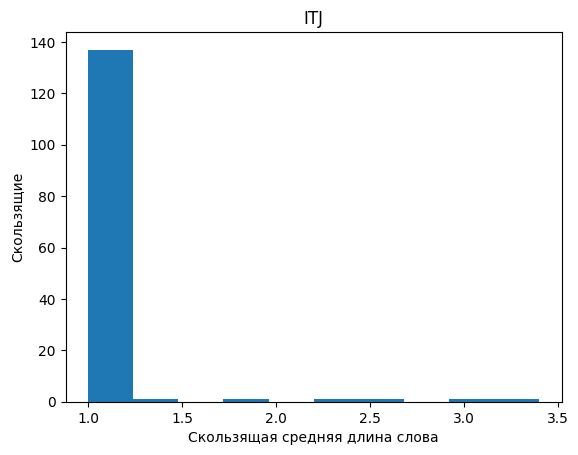

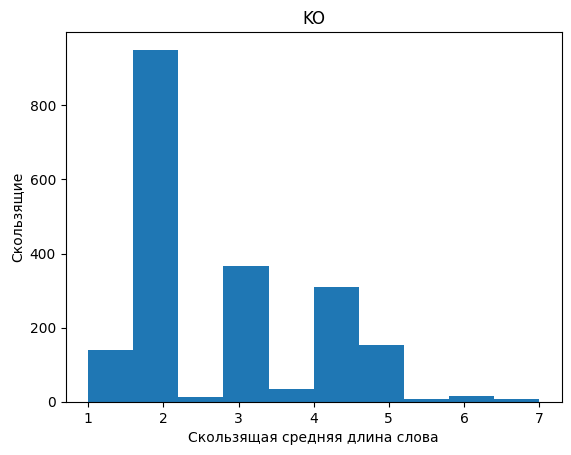

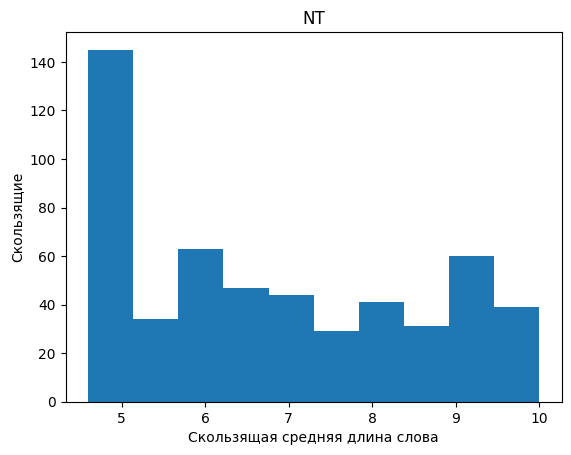

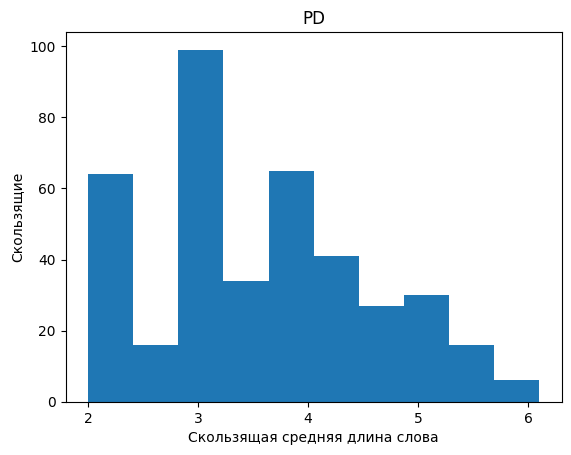

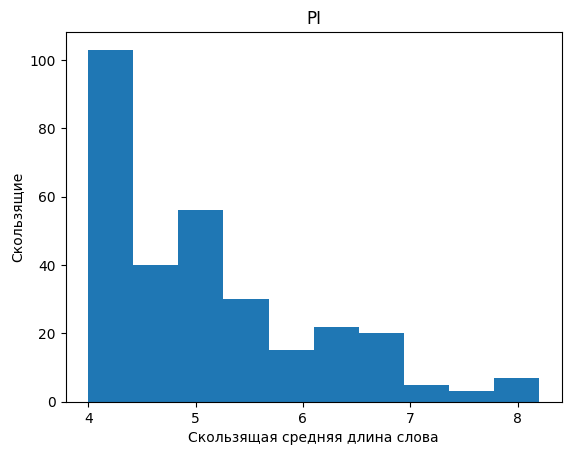

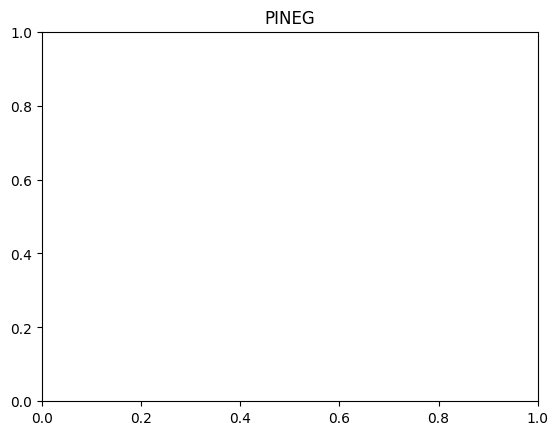

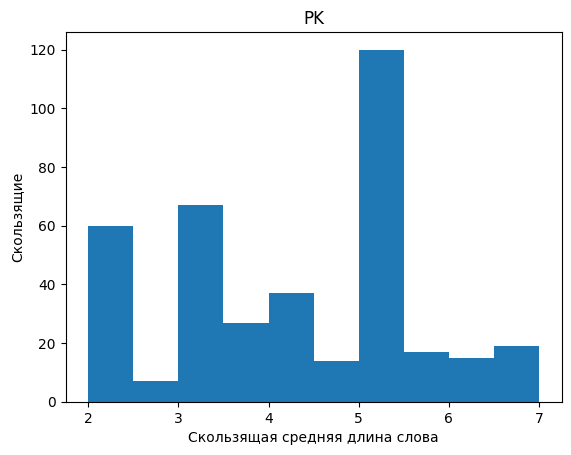

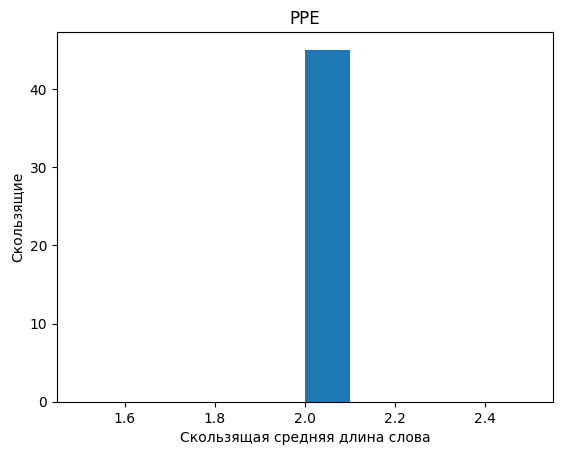

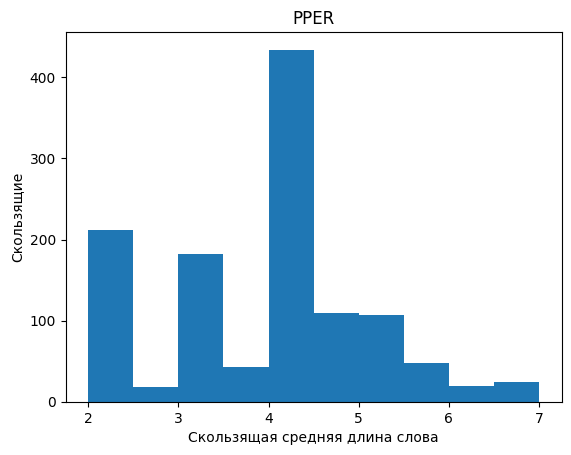

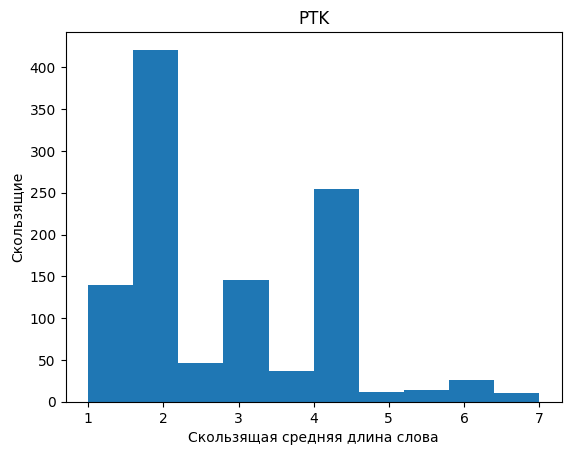

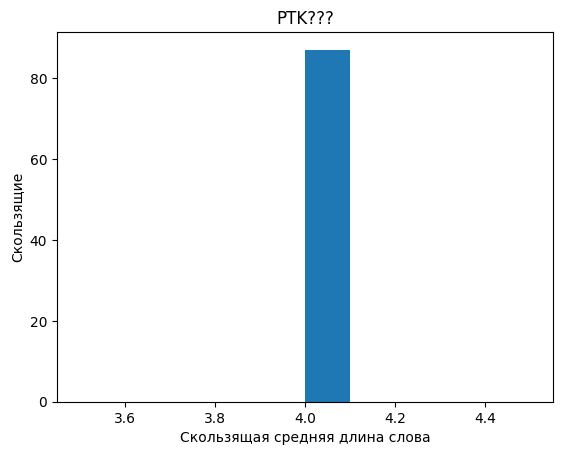

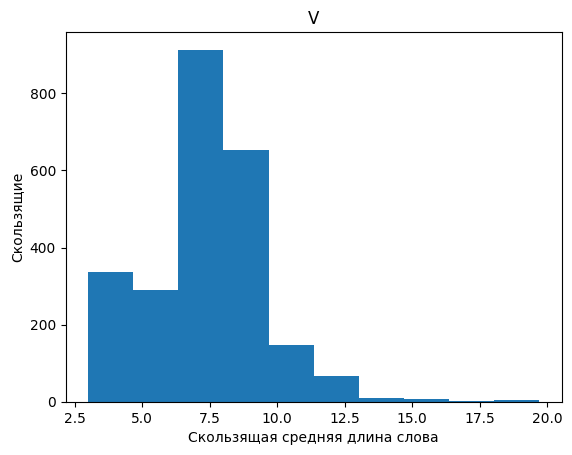

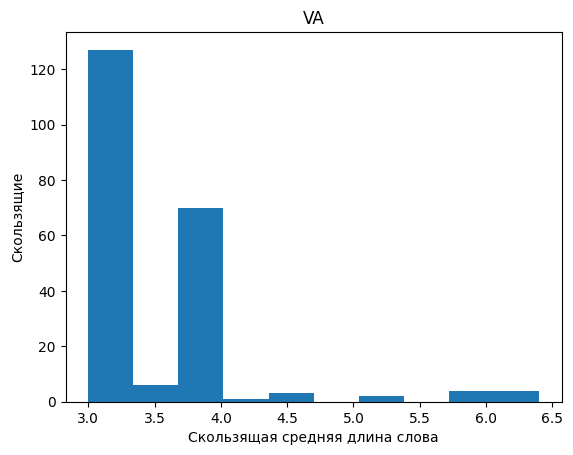

In [95]:
for k, i in enumerate(groups.groups.keys()):
    agr = groups.get_group(i)['WORD'].aggregate(lambda x: len(x)).rolling(window=10).mean()
    mean = groups.get_group(i)
    mean['Mean'] = pd.DataFrame(agr)
    mean.to_html(f'HTML/{k}_rolling_mean.html')
    try:
        plt.figure()
        plt.title(i)
        plt.hist(agr)
        plt.xlabel('Скользящая средняя длина слова')
        plt.ylabel('Скользящие')
        plt.savefig(f'plots/{i}_plt.png')
    except:
        continue